In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np

In [73]:
import json

scores = dict()
with open("scores.json", "r") as fi:
    scores = json.load(fi)

In [74]:
thresholds = np.array(list(reversed(scores["roc"]["thresholds"])))
gar = np.array(list(reversed(scores["roc"]["gar"])))
far = np.array(list(reversed(scores["roc"]["far"])))
frr = 1 - gar
grr = 1 - far

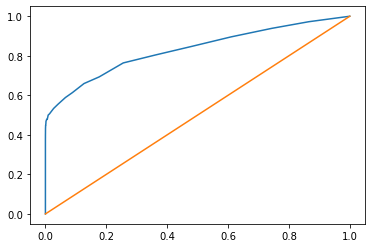

In [75]:
plt.plot(far, gar, label = "ROC curve")
plt.plot([0,1], [0,1], label = "Not valid")
_ = plt.show()

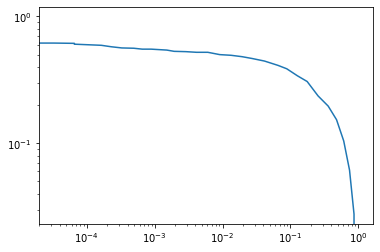

In [76]:
plt.plot(far, frr, label = "DET curve")
#plt.plot([1,0], [0,1], label = "Not valid")
plt.yscale('log')
plt.xscale('log')
_ = plt.show()

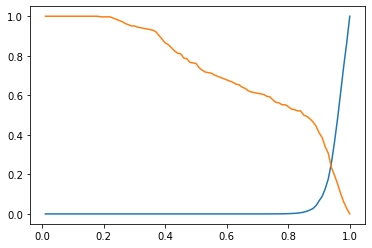

In [86]:
plt.plot(thresholds, far, label = "FAR curve")
plt.plot(thresholds, frr, label = "FRR curve")
_ = plt.show()

In [89]:
#equal error threshold
x = 0
err = 1
for i in range(len(far)):
    if abs(far[i]-frr[i]) < err:
        x= i
        err = abs(far[i]-frr[i])
print(thresholds[x])


0.94
